## Importing basic required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import cv2
import os
import matplotlib.pyplot as plt

---
## Looking into dataset Image

#### Healthy Lungs

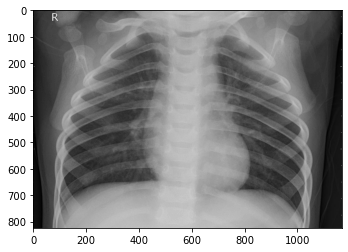

In [2]:
plane = cv2.imread('DATASET/NORMAL/0.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(plane, cmap='gray')
plt.show()

#### Covid Infected Lungs

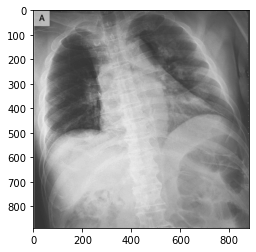

In [3]:
plane = cv2.imread('DATASET/COVID/0.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(plane, cmap='gray')
plt.show()

---
## Importing Image Processing Libraries

In [4]:
from skimage.io import imread, imshow
from skimage.draw import disk
from skimage.morphology import (erosion, dilation, closing, opening, area_closing, area_opening)
from skimage.color import rgb2gray
from PIL import Image as im

#### Creating a preprocessing structure element

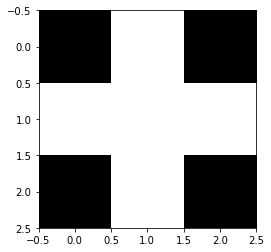

In [5]:
element = np.array([[0,1,0],
                    [1,1,1],
                    [0,1,0]])
plt.imshow(element, cmap='gray');

In [6]:
def multi_ero(im, num, element=element):
    for i in range(num):
        im = erosion(im, element)
    return im

---
## Showing pre-processing steps performed on the dataset images

#### For COVID infected lungs

Text(0.5, 1.0, 'Binarized Image')

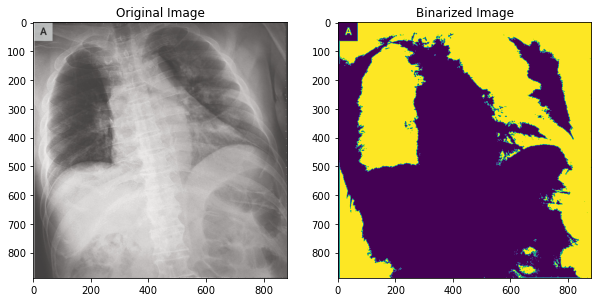

In [7]:
lungs = cv2.imread('DATASET/COVID/0.jpg', cv2.IMREAD_COLOR)
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].imshow(lungs);
ax[0].set_title('Original Image')
binary = rgb2gray(lungs)<0.50
ax[1].imshow(binary)
ax[1].set_title('Binarized Image')

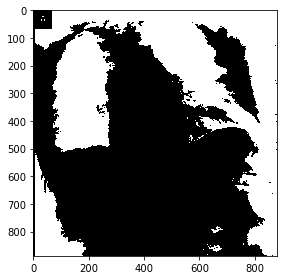

In [8]:
multi_eroded = multi_ero(binary, 2, element)
imshow(multi_eroded)

### For Healthy Lung

Text(0.5, 1.0, 'Binarized Image')

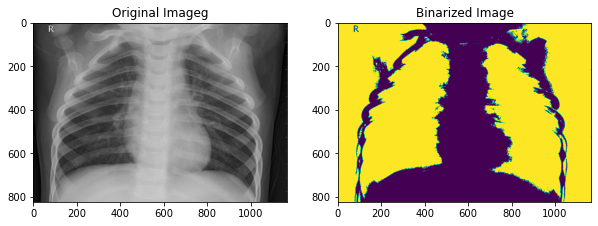

In [9]:
leaves = cv2.imread('DATASET/NORMAL/0.jpg', cv2.IMREAD_COLOR)
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].imshow(leaves);
ax[0].set_title('Original Imageg')
binary = rgb2gray(leaves)<0.50
ax[1].imshow(binary)
ax[1].set_title('Binarized Image')

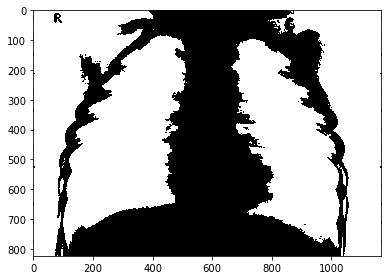

In [10]:
multi_eroded = multi_ero(binary, 2, element)
imshow(multi_eroded)

---
## Method to iterate through images and save the processed images.

In [11]:
def PreProcessImages(folder_dir, save_dir):
    for image in os.listdir(folder_dir):
        # check if the image ends with jpg
        if (image.endswith(".jpg")):
            lung = cv2.imread(folder_dir+image, cv2.IMREAD_COLOR)
            binary = rgb2gray(lung)<0.50
            multi_eroded = multi_ero(binary, 2, element)
            data = im.fromarray(multi_eroded)
            if not os.path.exists(save_dir):
                os.makedirs(save_dir)
            data.save(save_dir+image)
    print(f"{folder_dir} data processed and saved in {save_dir}.")

In [12]:
PreProcessImages('DATASET/COVID/','INPUT/COVID_PROCESSED/')

DATASET/COVID/ data processed and saved in INPUT/COVID_PROCESSED/.


In [13]:
PreProcessImages('DATASET/NORMAL/','INPUT/NORMAL_PROCESSED/')

DATASET/NORMAL/ data processed and saved in INPUT/NORMAL_PROCESSED/.


---
## Dividing dataset into train and test using splitFolders Library

In [14]:
import splitfolders as sf
def train_test_split(input_folder,output_folder):
    size = len(os.listdir(input_folder))
    train_size = size*0.7
    test_size = size*0.3
    print(train_size,test_size)
    sf.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .1, .1))

In [15]:
train_test_split('INPUT/','OUTPUT_PROCESSED/')
train_test_split('DATASET/','OUTPUT/')

1.4 0.6


Copying files: 392 files [00:01, 222.48 files/s]


1.4 0.6


Copying files: 392 files [00:00, 847.97 files/s]


---
## Importing Tensorflow libraries for model training

In [16]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

#### we use a Convolutional Neural Network model with ReLU activation function

In [17]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

---
### Traning model using normal dataset

In [18]:
# Initializing ImageDataGenerator
train_datagen = image.ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         horizontal_flip = True,
                                         zoom_range = 0.2)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  #using box plot
X.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
val_datagen = image.ImageDataGenerator(rescale=1./255)

In [19]:
# Loading processed training dataset
training_data = train_datagen.flow_from_directory('OUTPUT/train/',
                                                  target_size=(224,224),
                                                  class_mode='binary',
                                                  batch_size=32)

Found 312 images belonging to 2 classes.


In [20]:
training_data.class_indices

{'COVID': 0, 'NORMAL': 1}

In [21]:
# Loading processed Validation Dataset
val_data = val_datagen.flow_from_directory('OUTPUT/Val/',target_size=(224,224),class_mode='binary',batch_size=32)

Found 38 images belonging to 2 classes.


In [22]:
e = 20
hist_normal = model.fit(training_data,
                    steps_per_epoch=8,
                    epochs = e,
                    validation_data = val_data,
                    validation_steps = 2)
model.save('covid.h5')

Epoch 1/20
8/8 [==============================] - 34s 4s/step - loss: 0.8188 - accuracy: 0.6210 - val_loss: 0.6785 - val_accuracy: 0.9474
Epoch 2/20
8/8 [==============================] - 30s 4s/step - loss: 0.6120 - accuracy: 0.6532 - val_loss: 0.5289 - val_accuracy: 0.9474
Epoch 3/20
8/8 [==============================] - 31s 4s/step - loss: 0.4297 - accuracy: 0.8047 - val_loss: 0.3223 - val_accuracy: 0.9474
Epoch 4/20
8/8 [==============================] - 31s 4s/step - loss: 0.2909 - accuracy: 0.8468 - val_loss: 0.2834 - val_accuracy: 0.9474
Epoch 5/20
8/8 [==============================] - 31s 4s/step - loss: 0.2736 - accuracy: 0.9113 - val_loss: 0.2385 - val_accuracy: 0.9474
Epoch 6/20
8/8 [==============================] - 30s 4s/step - loss: 0.2483 - accuracy: 0.9153 - val_loss: 0.2682 - val_accuracy: 0.9474
Epoch 7/20
8/8 [==============================] - 30s 4s/step - loss: 0.1739 - accuracy: 0.9315 - val_loss: 0.1896 - val_accuracy: 0.9474
Epoch 8/20
8/8 [==================

In [23]:
model.evaluate(training_data)

10/10 [==============================] - 16s 2s/step - loss: 0.2383 - accuracy: 0.9583


[0.23833338916301727, 0.9583333134651184]

In [24]:
model.evaluate(val_data)

2/2 [==============================] - 2s 172ms/step - loss: 0.2495 - accuracy: 0.9474


[0.24953801929950714, 0.9473684430122375]

---
### Traning model using preprocessed dataset

In [25]:
# Loading processed training dataset
training_data = train_datagen.flow_from_directory('OUTPUT_PROCESSED/train/',
                                                  target_size=(224,224),
                                                  class_mode='binary',
                                                  batch_size=32)

Found 312 images belonging to 2 classes.


In [26]:
training_data.class_indices

{'COVID_PROCESSED': 0, 'NORMAL_PROCESSED': 1}

In [27]:
# Loading processed Validation Dataset
val_data = val_datagen.flow_from_directory('OUTPUT_PROCESSED/Val/',target_size=(224,224),class_mode='binary',batch_size=32)

Found 38 images belonging to 2 classes.


In [28]:
e = 20
hist_processed = model.fit(training_data,
                    steps_per_epoch=8,
                    epochs = e,
                    validation_data = val_data,
                    validation_steps = 2)
model.save('covid_processed.h5')

Epoch 1/20
8/8 [==============================] - 31s 4s/step - loss: 2.0095 - accuracy: 0.2661 - val_loss: 0.6915 - val_accuracy: 0.5526
Epoch 2/20
8/8 [==============================] - 30s 4s/step - loss: 0.6881 - accuracy: 0.5282 - val_loss: 0.6610 - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 30s 4s/step - loss: 0.6519 - accuracy: 0.5938 - val_loss: 0.6165 - val_accuracy: 0.5263
Epoch 4/20
8/8 [==============================] - 28s 3s/step - loss: 0.6135 - accuracy: 0.6371 - val_loss: 0.5122 - val_accuracy: 0.6842
Epoch 5/20
8/8 [==============================] - 28s 3s/step - loss: 0.5174 - accuracy: 0.7823 - val_loss: 0.3802 - val_accuracy: 0.9474
Epoch 6/20
8/8 [==============================] - 28s 4s/step - loss: 0.4521 - accuracy: 0.8427 - val_loss: 0.3129 - val_accuracy: 0.8947
Epoch 7/20
8/8 [==============================] - 29s 4s/step - loss: 0.3599 - accuracy: 0.8669 - val_loss: 0.2242 - val_accuracy: 0.9211
Epoch 8/20
8/8 [==================

In [29]:
model.evaluate(training_data)

10/10 [==============================] - 12s 1s/step - loss: 0.0918 - accuracy: 0.9744


[0.09181297570466995, 0.9743589758872986]

In [30]:
model.evaluate(val_data)

2/2 [==============================] - 1s 165ms/step - loss: 0.1233 - accuracy: 0.9474


[0.12328346073627472, 0.9473684430122375]

---
## Visualization of loss and Accuracy for both models

#### Model from Normal Dataset

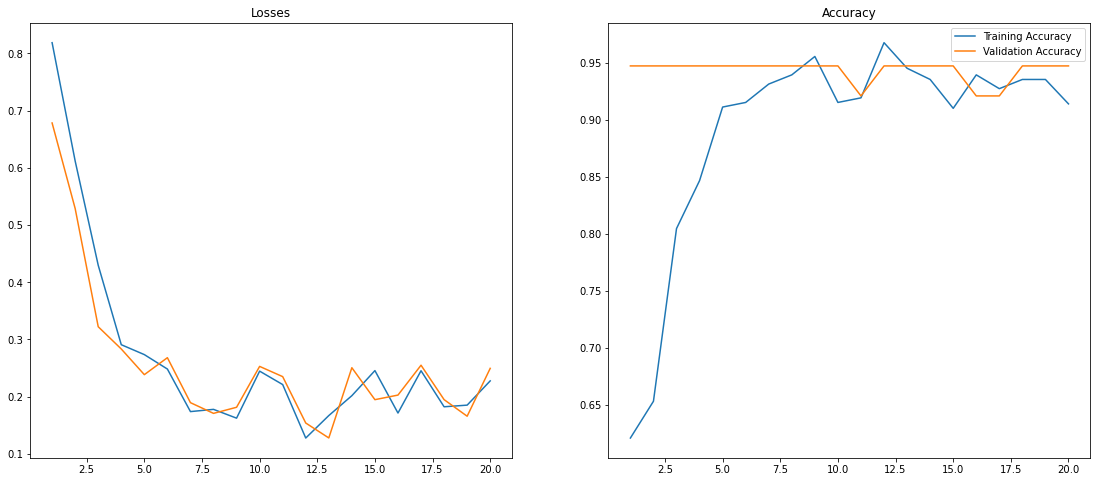

In [31]:
train_loss = hist_normal.history['loss']
val_loss = hist_normal.history['val_loss']
acc = hist_normal.history['accuracy']
val_acc = hist_normal.history['val_accuracy']

epochs = range(1,e+1)

plt.figure(figsize=(19,8))
plt.subplot(121)
plt.plot(epochs,train_loss,label='Training loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.title('Losses')

plt.subplot(122)
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.title('Accuracy')

plt.legend()

#### Model from Preprocessed Dataset

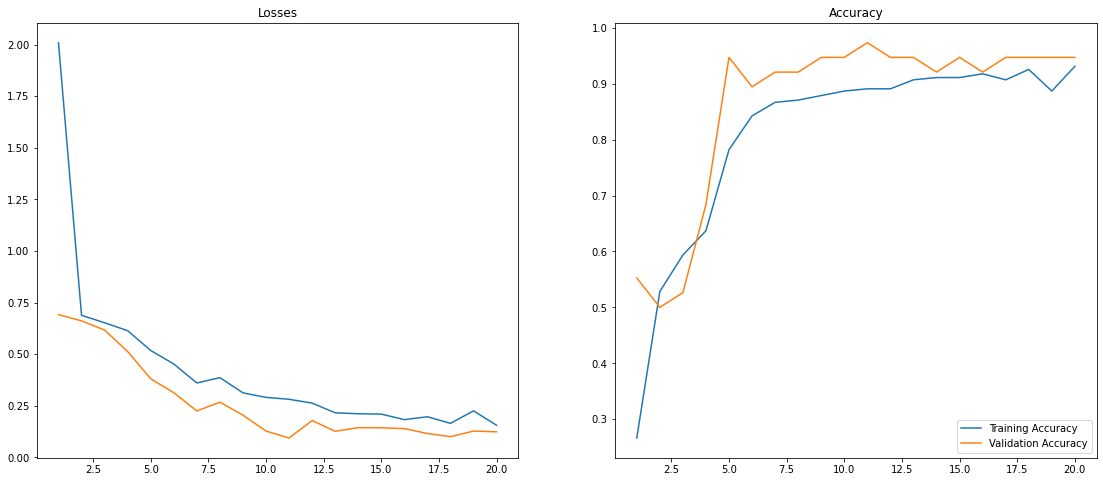

In [32]:
train_loss = hist_processed.history['loss']
val_loss = hist_processed.history['val_loss']
acc = hist_processed.history['accuracy']
val_acc = hist_processed.history['val_accuracy']

epochs = range(1,e+1)

plt.figure(figsize=(19,8))
plt.subplot(121)
plt.plot(epochs,train_loss,label='Training loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.title('Losses')

plt.subplot(122)
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.title('Accuracy')

plt.legend()

---
## Predicting using created models and generating confusion matrix.

1/1 [==============================] - 0s 40ms/step
Accuracy of model predictions: 97.61904761904762


<AxesSubplot:>

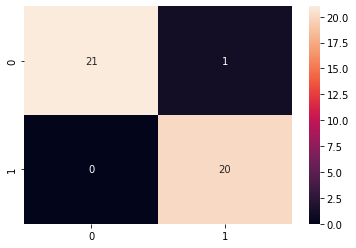

In [35]:
TP,TN,FP,FN = 0,0,0,0

model = load_model('covid.h5')

covid_path = 'OUTPUT/test/COVID/'
noraml_path = 'OUTPUT/test/NORMAL/'

for i in  os.listdir(covid_path):
    img = cv2.imread(covid_path+i)
    img = cv2.resize(img, (224, 224))
    img = img.reshape(1, 224, 224, 3)
    img = img/255.0
    pred = model.predict(img)
    if pred<0.5:
        TP+=1
    else:
        FN+=1

for i in os.listdir(noraml_path):
    img = cv2.imread(noraml_path+i)
    img = cv2.resize(img, (224, 224))
    img = img.reshape(1, 224, 224, 3)
    img = img/255.0
    pred = model.predict(img)
    if pred>0.5:
        TN+=1
    else:
        FP+=1
acc = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy of model predictions:',acc*100)
sns.heatmap([[TP,FP],[FN,TN]],annot=True)

## Our model gave 97.61% accuracy with unprocessed dataset.

1/1 [==============================] - 0s 45ms/step
Accuracy of model predictions: 95.23809523809523


<AxesSubplot:>

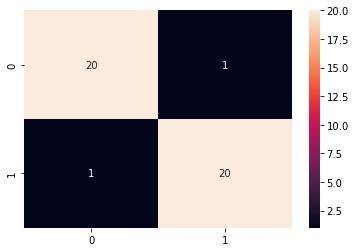

In [36]:
TP,TN,FP,FN = 0,0,0,0

model = load_model('covid_processed.h5')

covid_path = 'OUTPUT_PROCESSED/test/COVID_PROCESSED/'
noraml_path = 'OUTPUT_PROCESSED/test/NORMAL_PROCESSED/'

for i in  os.listdir(covid_path):
    img = cv2.imread(covid_path+i)
    img = cv2.resize(img, (224, 224))
    img = img.reshape(1, 224, 224, 3)
    img = img/255.0
    pred = model.predict(img)
    if pred<0.5:
        TP+=1
    else:
        FN+=1

for i in os.listdir(noraml_path):
    img = cv2.imread(noraml_path+i)
    img = cv2.resize(img, (224, 224))
    img = img.reshape(1, 224, 224, 3)
    img = img/255.0
    pred = model.predict(img)
    if pred>0.5:
        TN+=1
    else:
        FP+=1
        
acc = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy of model predictions:',acc*100)
sns.heatmap([[TP,FP],[FN,TN]],annot=True)

## Our model gave 95.23% accuracy with processed dataset.